## Задание 4. Модели линейной регрессии (часть II)

## Цель задания:
### 1. Получить прогнозные значения зависимой переменной
### 2. Построить регрессионную модель с фиктивными переменными
### 3. Оценить предсказательные возможности модели и предложить пути ее улучшения
### Цель исследования - выявить показатели, влияющие на темп роста ВВП

### 1.Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm ### получение регрессионной модели
import statsmodels.formula.api as smf ### получение регрессионной модели
import statsmodels.graphics.regressionplots as graph ### графический анализ регрессионной модели
import statsmodels.stats.api as test ### регрессионные тесты
import statsmodels.stats.outliers_influence ### регрессионные тесты
from patsy.contrasts import Treatment

In [2]:
import matplotlib.pyplot as plt # графическая библиотека

In [3]:
### %matplotlib inline

In [4]:
from __future__ import division #  деление с дробной частью (модуль из Python 3)

In [5]:
pd.set_option('display.max_colwidth',-1)# опция позволяет читать текстовые поля в "необрезанном виде"

<ipython-input-5-21748cb69847>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)# опция позволяет читать текстовые поля в "необрезанном виде"


### 2.Загрузка необходимых файлов

In [6]:
path='/Users/massimozharkovsky/Documents/ML/Econometrics/'

In [7]:
econ_model=pd.read_csv(path+'econ_model_ex_5.csv')
# загрузка данных, полученных в Задание 4

In [8]:
econ_model.head()

,Country,FP.CPI.TOTL.ZG,NE.GDI.TOTL.ZS,NY.GDP.PCAP.PP.CD,SL.UEM.TOTL.ZS,NY.GDP.MKTP.KD.ZG
0,AFG,4.383892,17.808790,7.548025,1.634000,2.260314
1,ALB,1.275125,25.223824,9.381616,15.220000,3.314805
2,ARM,-1.403608,18.015509,9.083481,17.617001,0.200000
3,AUS,1.276991,25.371979,10.764390,5.711000,2.770657
4,AUT,0.891592,24.188464,10.855329,6.014000,2.082608


### Для дальнейшего анализа нам понадобится информация о принадлежности  той или иной страны к определенному континенту

In [9]:
continent=pd.read_csv(path+'countryContinent.csv',encoding='latin-1')

In [10]:
continent.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [11]:
econ_model=econ_model.merge(continent[['code_3','continent']],left_on='Country',right_on='code_3')

In [12]:
econ_model.head()

,Country,FP.CPI.TOTL.ZG,NE.GDI.TOTL.ZS,NY.GDP.PCAP.PP.CD,SL.UEM.TOTL.ZS,NY.GDP.MKTP.KD.ZG,code_3,continent
0,AFG,4.383892,17.808790,7.548025,1.634000,2.260314,AFG,Asia
1,ALB,1.275125,25.223824,9.381616,15.220000,3.314805,ALB,Europe
2,ARM,-1.403608,18.015509,9.083481,17.617001,0.200000,ARM,Asia
3,AUS,1.276991,25.371979,10.764390,5.711000,2.770657,AUS,Oceania
4,AUT,0.891592,24.188464,10.855329,6.014000,2.082608,AUT,Europe


In [13]:
econ_model.drop('code_3',axis=1,inplace=True)

In [14]:
econ_model.columns=['Country','CPI','GDI','PCAP','UNEMP','GDP','Continent']

In [15]:
econ_model.head()

,Country,CPI,GDI,PCAP,UNEMP,GDP,Continent
0,AFG,4.383892,17.808790,7.548025,1.634000,2.260314,Asia
1,ALB,1.275125,25.223824,9.381616,15.220000,3.314805,Europe
2,ARM,-1.403608,18.015509,9.083481,17.617001,0.200000,Asia
3,AUS,1.276991,25.371979,10.764390,5.711000,2.770657,Oceania
4,AUT,0.891592,24.188464,10.855329,6.014000,2.082608,Europe


### 3. Построение модели множественной регрессии по данным Задания 4

### Регрессионную модель построим по анлогии с предыдущим заданием, при этом будем использовать символьную нотацию (форму записи) уравнения. Данная нотация преобразуется в математическое выражение с помощью библиотеки patsy и является аналогом символьной записи, применяемой в языке R.

In [16]:
results=smf.ols('GDP ~ CPI+GDI+PCAP+UNEMP',data=econ_model).fit()

In [17]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     7.410
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.97e-05
Time:                        23:47:36   Log-Likelihood:                -323.27
No. Observations:                 142   AIC:                             656.5
Df Residuals:                     137   BIC:                             671.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5416      1.909      4.998      0.0

### Проведем анализ вариации (ANOVA). Анализ построен на разложениее общей вариации процесса на две составляющие: вариация, объясненная моделью, и вариация остатков. В предыдущем задании мы уже проводили подобный анализ, считая самостоятельно указанные вариации. В данном задании воспользуемся возможностью statsmodels.

$\sum(y-\overline{y})^2=\sum(\hat{y}_x-\overline{y})^2-\sum(y-\hat{y}_x)^2$

In [18]:
ANOVA=pd.DataFrame()
ANOVA['Source']=['Model','Error','Total']
ANOVA['DF']=[results.df_model,results.df_resid,results.nobs-1]
ANOVA['MSE']= [results.mse_model,results.mse_resid,results.mse_total]
ANOVA['SumSq']=ANOVA['DF']*ANOVA['MSE']

In [19]:
ANOVA.head()

,Source,DF,MSE,SumSq
0,Model,4.0,42.688308,170.753233
1,Error,137.0,5.760946,789.249597
2,Total,141.0,6.808531,960.002830


### Добавим в исходный dataframe выравненные значения $\hat{Y}$ и остатки уравнения

In [20]:
econ_model['Fitted']=results.fittedvalues

In [21]:
econ_model['Resid']=results.resid

In [22]:
econ_model.head(10)

,Country,CPI,GDI,PCAP,UNEMP,GDP,Continent,Fitted,Resid
0,AFG,4.383892,17.808790,7.548025,1.634000,2.260314,Asia,4.387925,-2.127611
1,ALB,1.275125,25.223824,9.381616,15.220000,3.314805,Europe,2.957507,0.357298
2,ARM,-1.403608,18.015509,9.083481,17.617001,0.200000,Asia,3.020821,-2.820821
3,AUS,1.276991,25.371979,10.764390,5.711000,2.770657,Oceania,2.740209,0.030447
4,AUT,0.891592,24.188464,10.855329,6.014000,2.082608,Europe,2.650776,-0.568168
5,AZE,12.449496,25.681504,9.765207,5.000000,-3.064200,Asia,1.684448,-4.748648
6,BDI,5.557690,9.190554,6.611911,1.566000,-0.600020,Africa,4.382939,-4.982959
7,BEL,1.973853,24.193227,10.775941,7.830000,1.511106,Europe,2.387529,-0.876423
8,BEN,-0.848348,24.587966,7.682370,2.419000,3.964860,Africa,5.461567,-1.496707
9,BFA,-0.244764,22.883732,7.480343,6.364000,5.906025,Africa,5.102084,0.803941


### 4. Прогнозные оценки, получаемые на основе регрессии

### Эконометрические модели служат не только для анализа влияния факторов на зависимую переменную, но и для целей прогнозирования. Данная часть задания посвящена построению интервальных оценок выравненных или прогнозных значений.

### Интервальная оценка строится как для среднего значения, предсказанного моделью, так и для точечной оценки. В библиотеке statsmodels используются следующие формулы:

### Точечная  оценка $\Delta=t(1-\frac{\alpha}{2},\nu=n-k)\sqrt{1+x_0(X^{'}X)^{-1}x_0^{'}}$
### Средняя оценка $\Delta=t(1-\frac{\alpha}{2},\nu=n-k)\sqrt{x_0(X^{'}X)^{-1}x_0^{'}}$

In [23]:
pred=results.get_prediction()
### инициализация процедуры расчета интервальных оценок выравненных значений

In [24]:
pd.concat([pred.summary_frame(),econ_model[['Country','GDP','Fitted']]],axis=1).head(10)
### получение интервальных оценок

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,Country,GDP,Fitted
0,4.387925,0.474231,3.450166,5.325683,-0.450054,9.225904,AFG,2.260314,4.387925
1,2.957507,0.338872,2.287412,3.627603,-1.835788,7.750802,ALB,3.314805,2.957507
2,3.020821,0.465792,2.099750,3.941893,-1.813951,7.855593,ARM,0.200000,3.020821
3,2.740209,0.313024,2.121226,3.359193,-2.046208,7.526626,AUS,2.770657,2.740209
4,2.650776,0.323334,2.011405,3.290148,-2.138320,7.439873,AUT,2.082608,2.650776
5,1.684448,0.532191,0.632077,2.736819,-3.177047,6.545943,AZE,-3.064200,1.684448
6,4.382939,0.701560,2.995651,5.770226,-0.561878,9.327756,BDI,-0.600020,4.382939
7,2.387529,0.305956,1.782522,2.992537,-2.397100,7.172159,BEL,1.511106,2.387529
8,5.461567,0.507055,4.458901,6.464233,0.610589,10.312545,BEN,3.964860,5.461567
9,5.102084,0.487764,4.137565,6.066603,0.258847,9.945321,BFA,5.906025,5.102084


### Получение интервальной оценки на примере наблюдения с индексом 3 (Австралия)

In [25]:
n=econ_model.shape[0] ### число наблюдений
k=4 # число параметров, включая свободный член

In [26]:
X_m=sm.add_constant(econ_model.iloc[:,[1,2,3,4]],prepend=True)

In [27]:
X_m

,const,CPI,GDI,PCAP,UNEMP
0,1.0,4.383892,17.808790,7.548025,1.634000
1,1.0,1.275125,25.223824,9.381616,15.220000
2,1.0,-1.403608,18.015509,9.083481,17.617001
3,1.0,1.276991,25.371979,10.764390,5.711000
4,1.0,0.891592,24.188464,10.855329,6.014000
...,...,...,...,...,...
137,1.0,-0.149642,26.580523,9.348963,20.065001
138,1.0,3.243567,26.578058,8.758615,1.851000
139,1.0,6.594604,19.160966,9.487065,26.551001
140,1.0,17.869730,38.206231,8.293551,7.372000


In [28]:
forecast=np.array([1,econ_model.iloc[3,1],econ_model.iloc[3,2],econ_model.iloc[3,3],econ_model.iloc[3,4]])
### массив со значением независимых переменных Х, используемый 
### для получения выравненного (прогнозного) значения Y

In [29]:
forecast

array([ 1.        ,  1.27699094, 25.37197856, 10.76438988,  5.71099997])

### Матрица  $(X^{'}X)^{-1}$ 

In [30]:
np.linalg.inv(np.dot(X_m.T,X_m))
### расчет с использованием numpy

array([[ 6.32741127e-01, -6.51665715e-03, -2.93408471e-03,
        -5.49754383e-02, -1.98571291e-03],
       [-6.51665715e-03,  4.25312025e-04, -5.33421448e-06,
         5.51395960e-04,  1.94254048e-05],
       [-2.93408471e-03, -5.33421448e-06,  1.22419556e-04,
        -2.65929123e-05,  2.71396142e-05],
       [-5.49754383e-02,  5.51395960e-04, -2.65929123e-05,
         5.74428852e-03, -3.41304896e-05],
       [-1.98571291e-03,  1.94254048e-05,  2.71396142e-05,
        -3.41304896e-05,  2.05139967e-04]])

In [31]:
results.normalized_cov_params
### использование функции statsmodels

,Intercept,CPI,GDI,PCAP,UNEMP
Intercept,0.632741,-0.006517,-0.002934,-0.054975,-0.001986
CPI,-0.006517,0.000425,-0.000005,0.000551,0.000019
GDI,-0.002934,-0.000005,0.000122,-0.000027,0.000027
PCAP,-0.054975,0.000551,-0.000027,0.005744,-0.000034
UNEMP,-0.001986,0.000019,0.000027,-0.000034,0.000205


### Расчет стандартного отклонения для точечной и средней оценок

In [32]:
sigma_point=np.sqrt(results.mse_resid)*np.sqrt(1+np.dot(np.dot(forecast,np.linalg.inv(np.dot(X_m.T,X_m))),forecast.T))

In [33]:
sigma_mean=np.sqrt(results.mse_resid)*np.sqrt(np.dot(np.dot(forecast,np.linalg.inv(np.dot(X_m.T,X_m))),forecast.T))

In [34]:
sigma_point

2.420522673771461

In [35]:
sigma_mean

0.3130240439926128

### Интервалы для точечной и средней оценок

In [36]:
delta_mean=stats.t.ppf(0.975,n-k)*sigma_mean

In [37]:
delta_mean

0.6189435509218002

In [38]:
delta_point=stats.t.ppf(0.975,n-k)*sigma_point

In [39]:
delta_point

4.7861080563708835

In [40]:
econ_model.loc[3,'Fitted']-delta_point,econ_model.loc[3,'Fitted']+delta_point

(-2.0458988288450115, 7.526317283896756)

In [41]:
econ_model.loc[3,'Fitted']-delta_mean,econ_model.loc[3,'Fitted']+delta_mean

(2.1212656766040716, 3.3591527784476725)

### 5. Предсказательные свойства модели и ее практическая применимость

### На предыдущих этапах была получена и проанализирована модель, описывающая влияние рзличных факторов на экономический рост. Модель объясняет только порядка 18% вариации зависимой переменной Y. Попробуем рассмотреть причины низкой предсказательной способности модели и  наметить пути ее улучшения.

### Одной из причин низкой предсказательной способности модели является то, что она дает систематическую ошибку для тех стран, у которых имеет место отрицательный рост.   

In [42]:
econ_model[econ_model['GDP']<0]

,Country,CPI,GDI,PCAP,UNEMP,GDP,Continent,Fitted,Resid
5,AZE,12.449496,25.681504,9.765207,5.000,-3.064200,Asia,1.684448,-4.748648
6,BDI,5.557690,9.190554,6.611911,1.566,-0.600020,Africa,4.382939,-4.982959
15,BLR,11.836581,26.477583,9.803580,5.840,-2.526446,Europe,1.735968,-4.262414
17,BRA,8.739128,14.974618,9.637668,11.609,-3.305358,Americas,1.275254,-4.580613
18,BRN,-0.739069,34.619655,11.266189,8.559,-2.465515,Asia,3.004532,-5.470047
28,COG,3.190562,27.759583,8.671457,9.709,-2.800019,Africa,3.712015,-6.512034
38,ECU,1.728265,24.979035,9.325638,4.597,-1.226384,Americas,3.739833,-4.966217
49,GRC,-0.825652,11.474562,10.213687,23.539,-0.190952,Europe,1.311542,-1.502494
75,LBR,8.834249,20.084044,7.146683,2.150,-1.599584,Africa,4.025588,-5.625172
82,MAC,2.370161,21.586437,11.567202,1.900,-0.718343,Asia,2.088672,-2.807015


In [43]:
econ_model[econ_model['Fitted']<0]

,Country,CPI,GDI,PCAP,UNEMP,GDP,Continent,Fitted,Resid


### Построим модель только для стран с неотрицательным ростом. В данной модели показатели инфляции и инвестиций оказываются незначимыми.

In [44]:
results_2=smf.ols('GDP ~ CPI+GDI+PCAP+UNEMP',data=econ_model[econ_model['GDP']>=0]).fit()

In [45]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     7.777
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.24e-05
Time:                        23:47:36   Log-Likelihood:                -276.39
No. Observations:                 131   AIC:                             562.8
Df Residuals:                     126   BIC:                             577.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1330      1.741      5.821      0.0

### Для улучшения модели можно предложить следующие варианты:
###  - построение не одной  модели, а нескольких моделей для разных групп стран
###  - включение в модель других экономических показателей
###  - включение в модель степеней независимых переменных ($X^2$)
###  -  включение в модель качественных переменных

### 6. Включение фиктивных переменных в регрессионную модель

### Построим простую регрессионную модель, включив в нее качестенную переменную, показывающую принадлежность страны к определенному континенту. Для этой целей применем процедуру кодирования или бинаризации к данной перменной. Качественная переменная превращаетя в, так называемые, фиктивные переменные  (dummy variables).

In [46]:
pd.get_dummies(econ_model['Continent']).head()
### преобразование качественных переменных можно реализовать с помощью pandas

,Africa,Americas,Asia,Europe,Oceania
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,1,0


### Значение 1 фиктивной переменной означает принадлежность к тому или иному континенту. Для создания фиктивных переменных с целью их включения  в регрессионную модель необходимо выбрать базовый уровень качественной переменной (или референтную группу). Таким образом, при n различных значениях качественной переменной в модели появится n-1 фиктивных переменных. Это делается с помощью команд библиотеки patsy. В рассматриваемом примере базовым уровнем выступает европейский континент.

In [47]:
results_3=smf.ols("GDP ~ C(Continent,Treatment('Europe'))+CPI",data=econ_model).fit()

In [48]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     2.357
Date:                Sun, 28 Feb 2021   Prob (F-statistic):             0.0435
Time:                        23:47:36   Log-Likelihood:                -331.28
No. Observations:                 142   AIC:                             674.6
Df Residuals:                     136   BIC:                             692.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### Интерпретация модели.  Роль фиктивной перменной в данном случае сводится к новой интерпретации свободного члена регрессионного уравнения. В рассматриваемой модели базой являтся Европа, таким образом свободный член показвает, каким в среднем должен быть рост в Европе при нулевой инфляции. Значение коэффициентов регрессии при фиктивных переменных показывает, как изменится экономический рост при "переходе" от одного континента к другому. Например, при прочих равных (т.е. без учета эффекта инфляции) рост в азиатских странах составит исходя из модели 2.76%+1.36% = 4.13%. Таким образом, мы оцениваем влияние на рост принадлежность к тому или иному континенту.

### Регрессионное уравнение только для Европы

In [49]:
results_4=smf.ols("GDP ~ CPI",data=econ_model[econ_model.Continent=='Europe']).fit()

In [50]:
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     5.075
Date:                Sun, 28 Feb 2021   Prob (F-statistic):             0.0303
Time:                        23:47:36   Log-Likelihood:                -71.283
No. Observations:                  39   AIC:                             146.6
Df Residuals:                      37   BIC:                             149.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8339      0.266     10.650      0.0

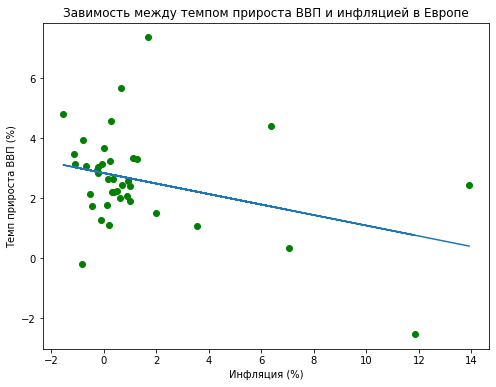

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(econ_model[econ_model.Continent=='Europe']['CPI'],econ_model[econ_model.Continent=='Europe']['GDP'], c='green')
plt.plot(econ_model[econ_model.Continent=='Europe']['CPI'],results_4.fittedvalues)
plt.title('Завимость между темпом прироста ВВП и инфляцией в Европе')
plt.ylabel('Темп прироста ВВП (%)')
plt.xlabel('Инфляция (%)')
plt.show()
plt.gcf().clear()

### Регрессионное уравнение только с фиктивными переменными

In [52]:
results_5=smf.ols("GDP ~ C(Continent,Treatment('Europe'))",data=econ_model).fit()

In [53]:
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.569
Date:                Sun, 28 Feb 2021   Prob (F-statistic):              0.186
Time:                        23:47:36   Log-Likelihood:                -334.00
No. Observations:                 142   AIC:                             678.0
Df Residuals:                     137   BIC:                             692.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [54]:
results_3.model.exog[0]
### пример наблюдения с учетом фиктивных переменных

array([1.        , 0.        , 0.        , 1.        , 0.        ,
       4.38389196])

## Задание

### Для выполнения данного задания необходимо загрузить данные, подготовленные в Задании 4    
### 1. Построить интервальные прогнозные оценки для зависимой переменной
### 2. Построить  модель  линейной регрессии с фиктивными переменными (в примере разобрано несколько моделей, достаточно построить только общую модель).  Для перменной Continent рассмотреть разные референтные группы.
### 3. Сформулировать основные выводы, указать недостатки модели и наметить возможные пути ее улучшения